In [1]:
from sklearn.datasets import make_classification

In [43]:
X, y = make_classification(n_samples=400,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=3,
                           n_clusters_per_class=1)

In [44]:
import matplotlib.pyplot as plt

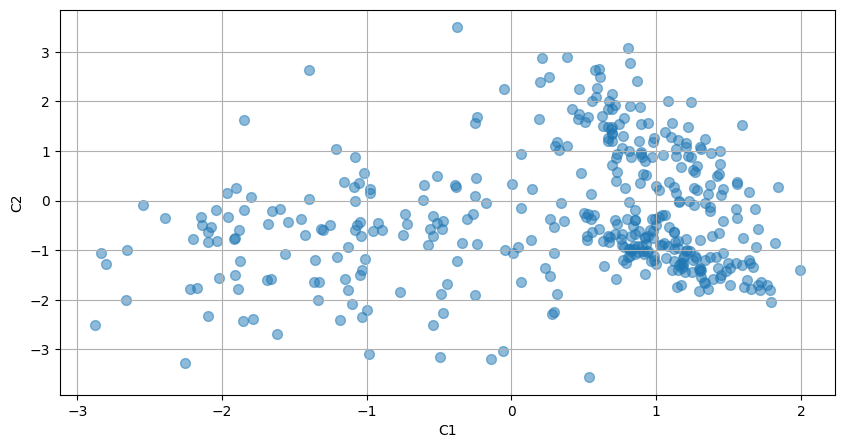

In [45]:
_ = plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()

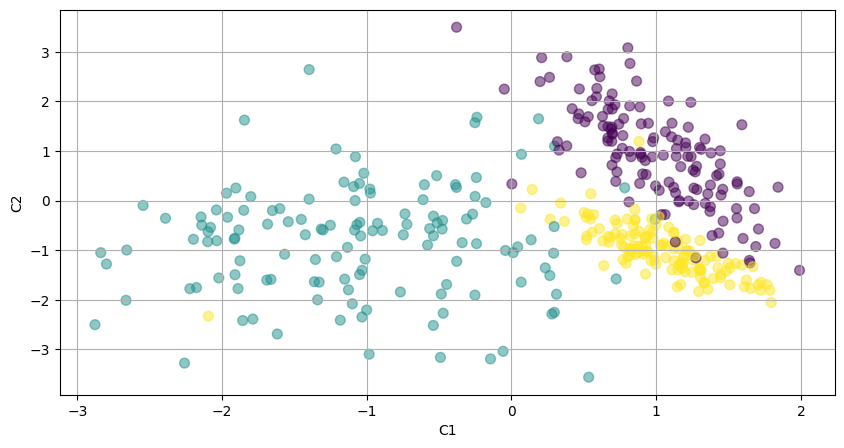

In [46]:
_ = plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.94982895, -0.00410644],
       [-1.20091038, -1.03535697]])

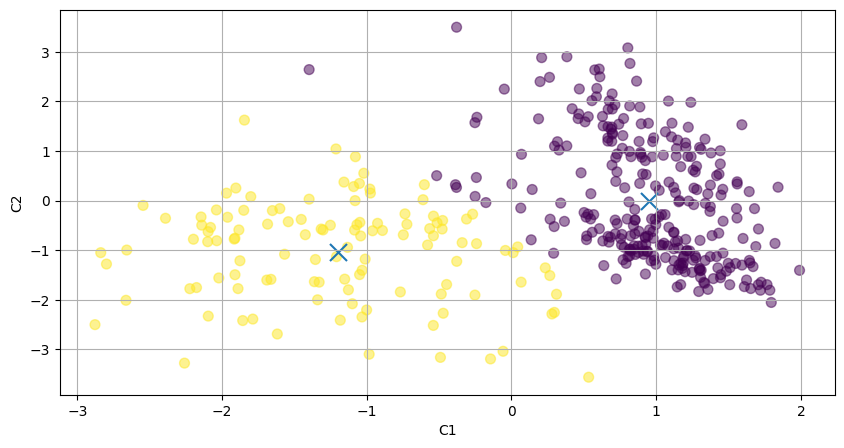

In [48]:
_ = plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, marker="x")
plt.xlabel("C1")
plt.ylabel("C2")
plt.grid(True)
plt.show()

In [49]:
from scipy.spatial.distance import cdist
import numpy as np

In [50]:
distortions = []
inertias = []
K = range(1, 10)

for k in K:
  model = KMeans(n_clusters=k)
  model.fit(X)

  distortion = sum(np.min(cdist(X, model.cluster_centers_), axis=1)) / X.shape[0]
  inertia = model.inertia_

  distortions.append(distortion)
  inertias.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

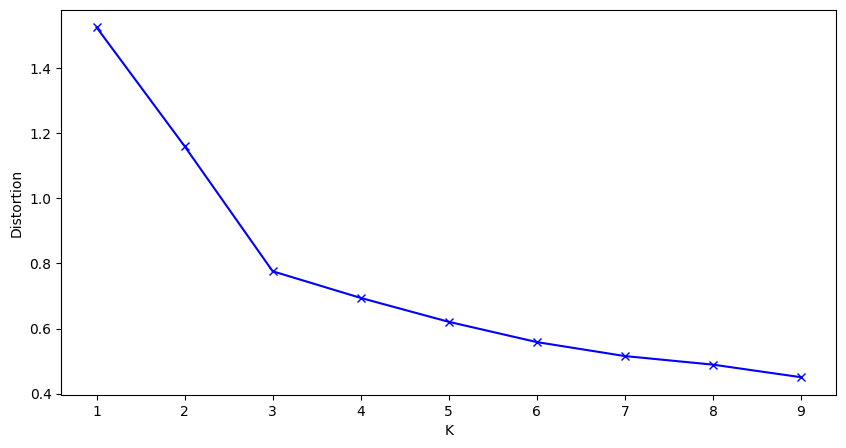

In [51]:
_ = plt.figure(figsize=(10, 5))
plt.plot(K, distortions, "bx-")
plt.xlabel("K")
plt.ylabel("Distortion")
plt.show()